# Sheet

# Brain Age Prediction using diffusion MRI structural connectivity features 

## Imports

In [2]:
from keras.layers import Conv2D,Conv1D,MaxPool2D,MaxPool1D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.models import Sequential
import scipy.io
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf  

from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout, Input, BatchNormalization,Concatenate
from matplotlib.pyplot import cm
from keras.models import Model

In [3]:
import scipy.io

PATH = './'

PATH_TRAIN = 'train_data.mat'
PATH_TEST = 'test_data.mat'

#EPOCHS = 40
#BATCH_SIZE = 32

In [4]:
#from numpy.random import seed
#seed(1)

# 0. Preparação do Setup

**Definir se se usa CPU ou GPU**

In [5]:
# Load libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [6]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available() 
device = torch.device("cuda:0" if use_cuda else "cpu") 
print(device)

cpu


# 1. Preparação dos Dados

## CSV

In [7]:
train_extra = pd.read_csv("train.csv", header=0)
test_extra = pd.read_csv("test.csv", header=0)

## MAT

In [8]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np

train_data, test_data = get_data_from_mat(PATH_TRAIN, PATH_TEST)

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# 2. Visualização de dados

## CSV

### Treino

In [9]:
train_extra.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


In [10]:
train_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [11]:
train_extra.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [12]:
train_without_id = train_extra.drop('id',axis = 1)
train_without_id

,age,sex,education
0,13,1,7
1,14,0,8
2,15,1,9
3,15,1,9
4,15,1,9
...,...,...,...
107,77,1,4
108,67,0,4
109,55,0,4
110,76,1,3


#### Pair Plot

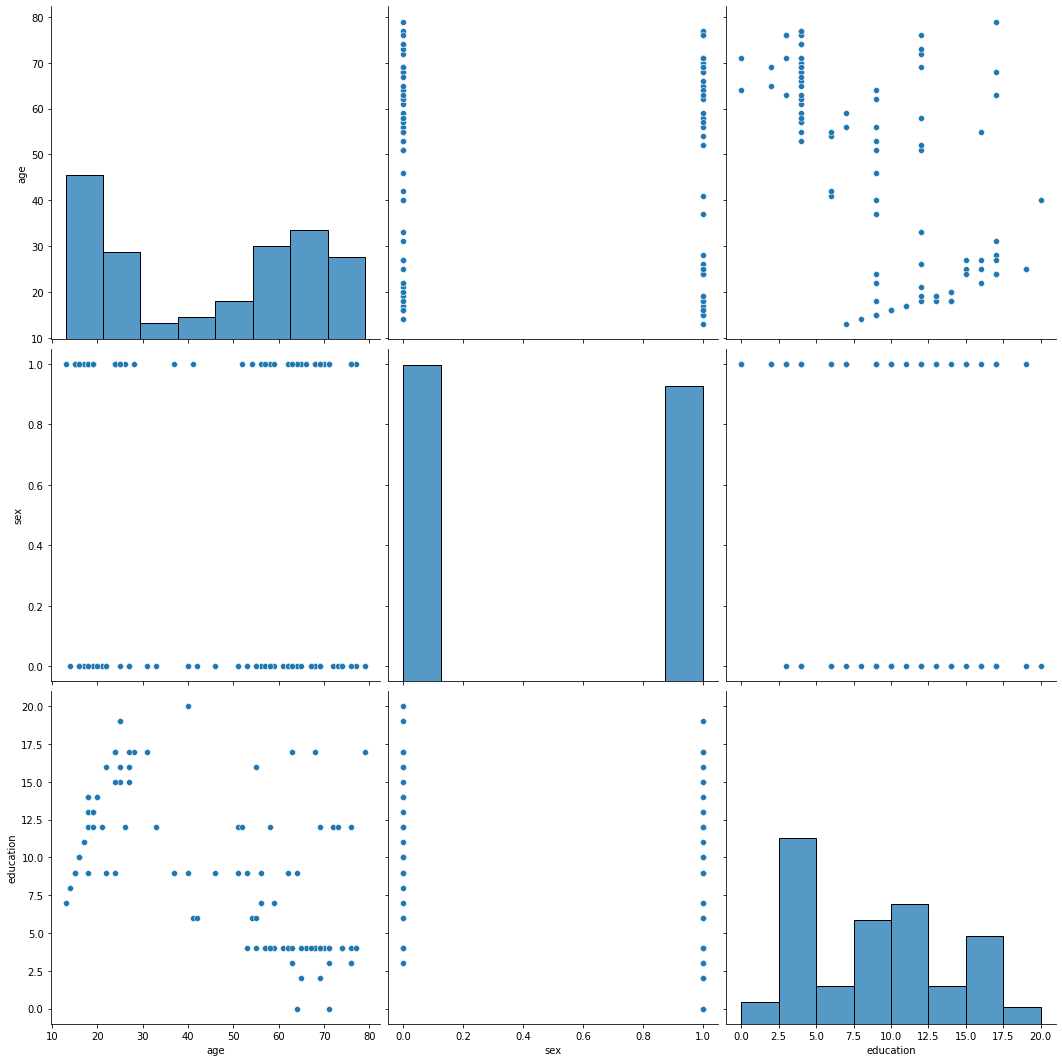

In [13]:
cols = ['age', 'sex', 'education']
sns.pairplot(train_without_id[cols], height=5)
#plt.show()

#### Matriz de Correlação

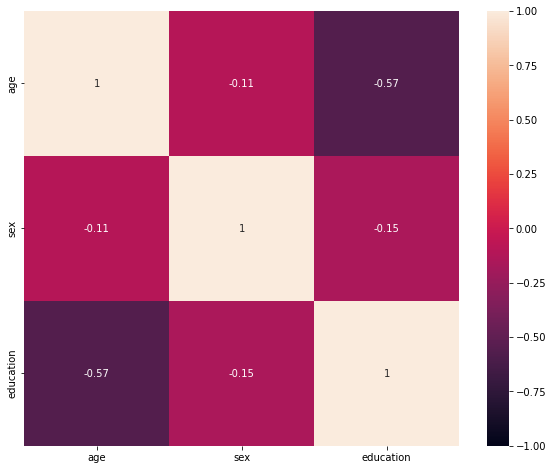

In [14]:
corr_matrix = train_without_id.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

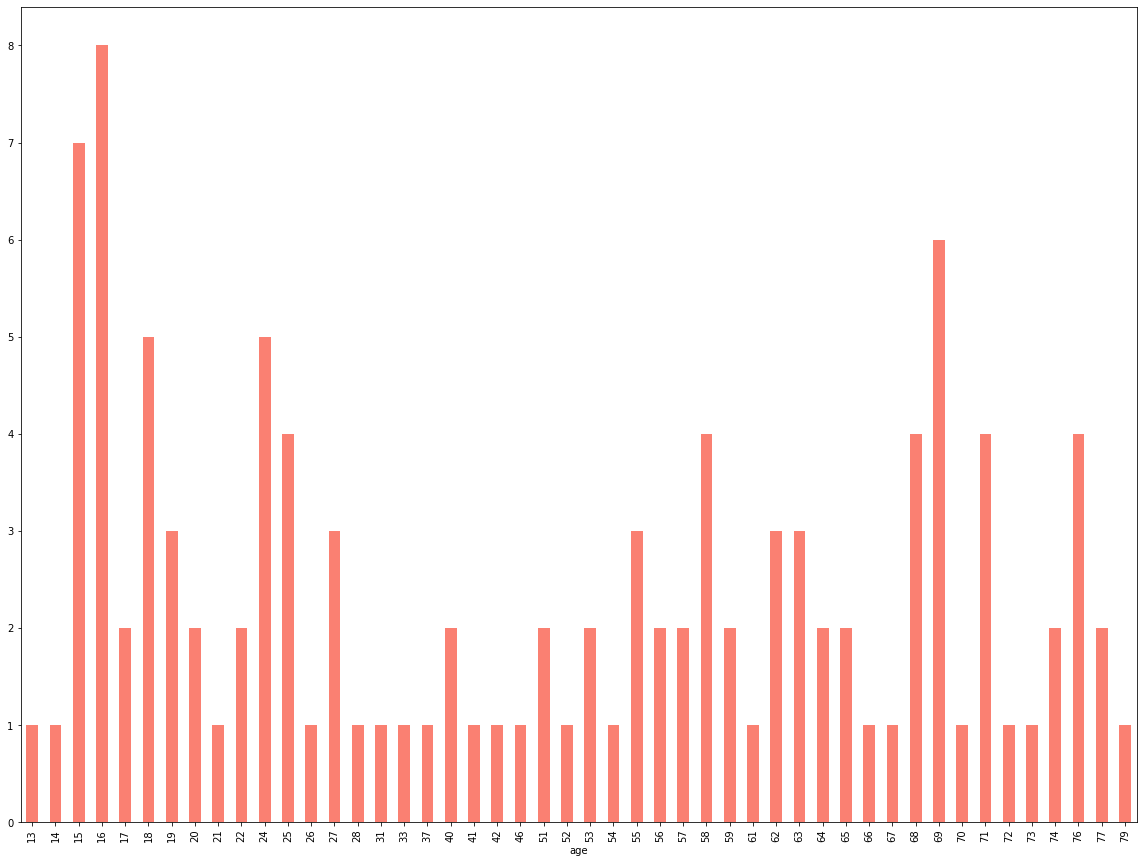

In [15]:
ages = train_extra.groupby('age').count()
ages.plot(kind='bar',figsize=(20,15),legend=None,color="salmon")

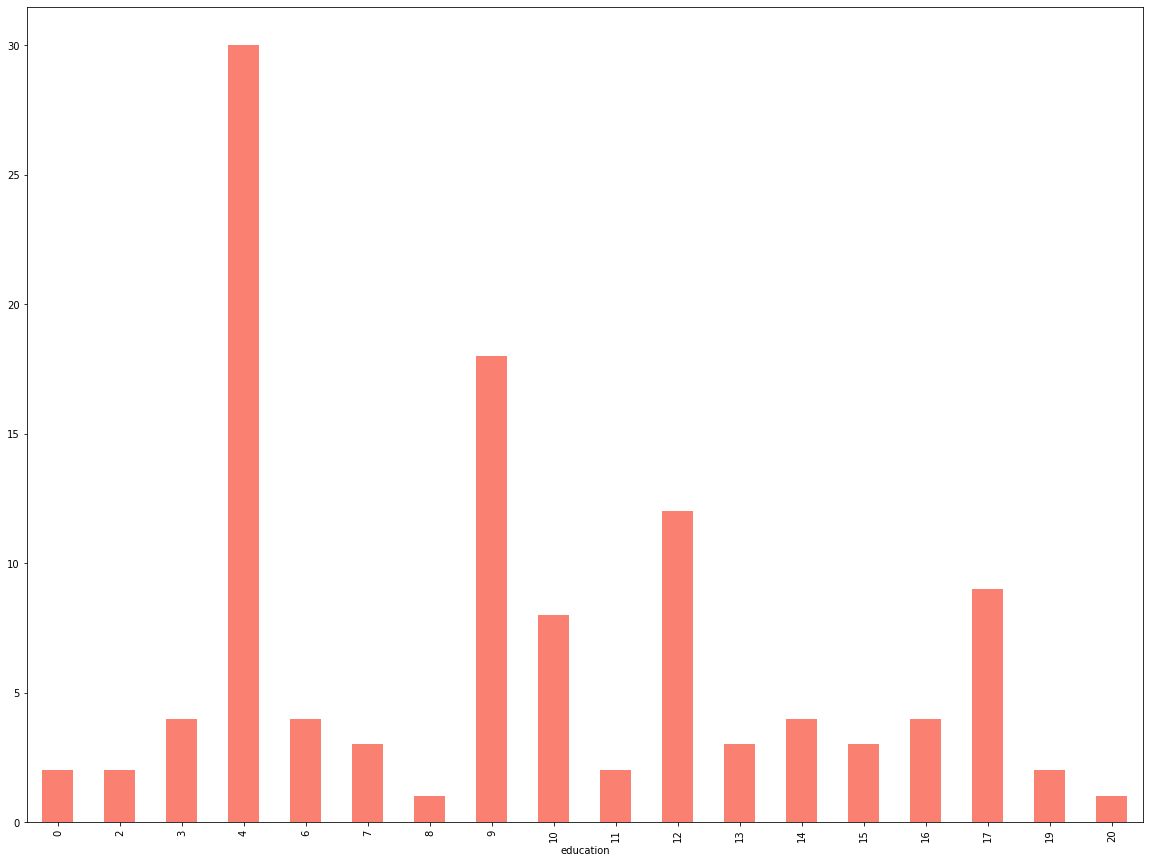

In [16]:
ed = train_extra.groupby('education').count()
ed.plot(kind='bar',figsize=(20,15),legend=None,color="salmon")

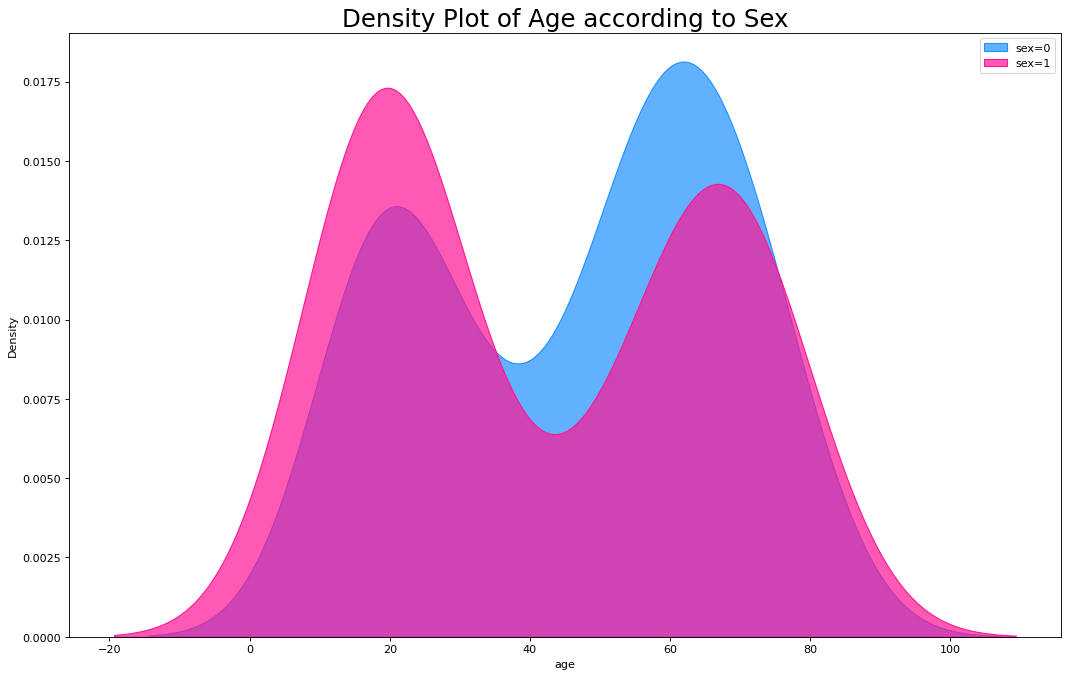

In [17]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(train_without_id.loc[train_without_id['sex'] == 0, "age"], shade=True, color="dodgerblue", label="sex=0", alpha=.7)
sns.kdeplot(train_without_id.loc[train_without_id['sex'] == 1, "age"], shade=True, color="deeppink", label="sex=1", alpha=.7)

#sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of Age according to Sex', fontsize=22)
plt.legend()
plt.show()

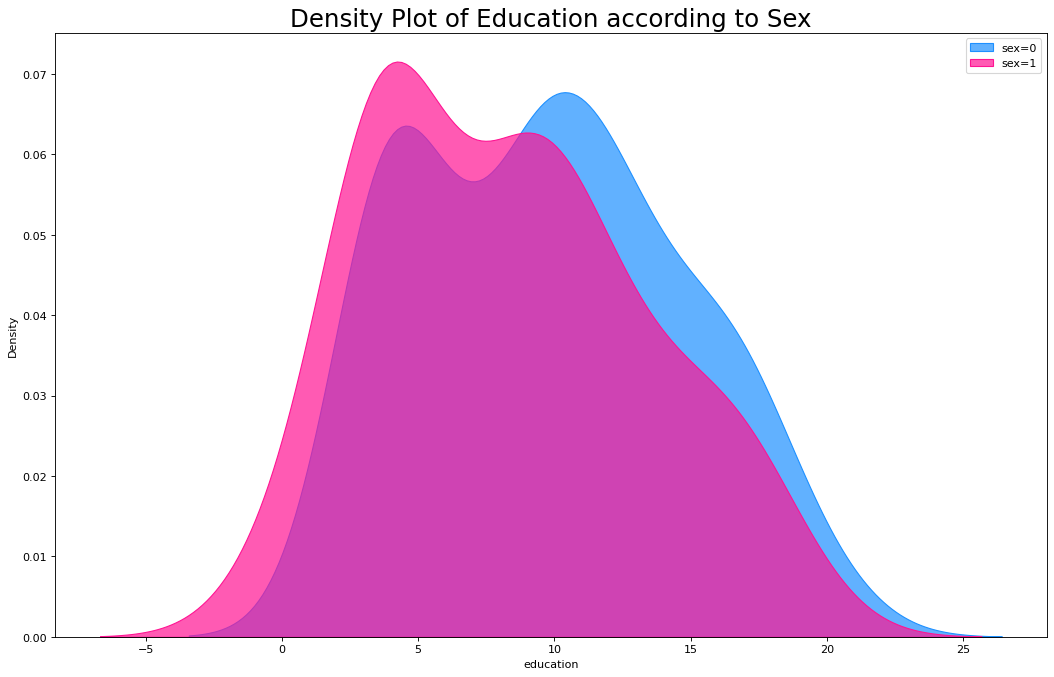

In [18]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(train_without_id.loc[train_without_id['sex'] == 0, "education"], shade=True, color="dodgerblue", label="sex=0", alpha=.7)
sns.kdeplot(train_without_id.loc[train_without_id['sex'] == 1, "education"], shade=True, color="deeppink", label="sex=1", alpha=.7)

# Decoration
plt.title('Density Plot of Education according to Sex', fontsize=22)
plt.legend()
plt.show()

### Teste

In [19]:
test_extra

,id,sex,education
0,1,0,13
1,2,0,11
2,3,1,9
3,4,1,13
4,5,0,12
5,6,0,17
6,7,0,9
7,8,0,4
8,9,1,9
9,10,1,4


## MAT

In [20]:
print(train_data[0])

[[0.         0.         0.13152513 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.13152513 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.28060623]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28060623 0.         0.        ]]


ds shape: (112, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024116160549305543
55


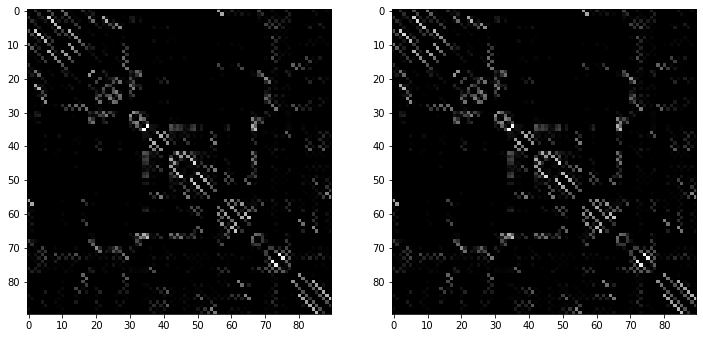

In [21]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

def visualize(image):  
    plt.figure("sample", (12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")    
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap="gray")
    plt.show()      

#@interact
def show_ds(ds):
    print("ds shape:",ds.shape)
    print("ds max:",np.max(ds))
    print("ds min:",np.min(ds))
    print("ds average:",np.average(ds))
    @interact
    def visualize_set(scan_index=(0,len(ds)-1)):
        print(scan_index)
        visualize(ds[scan_index,:,:])

show_ds(train_data)

ds shape: (28, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024994026906171023
13


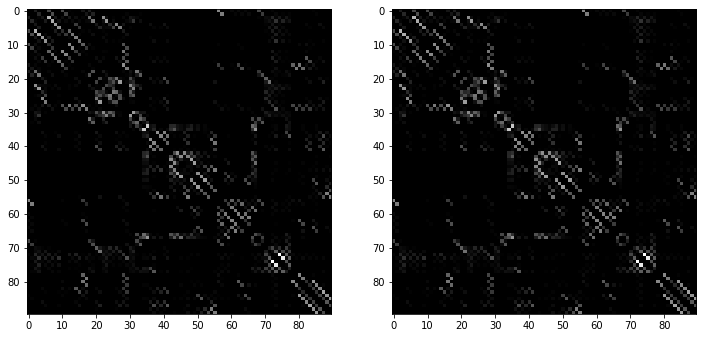

In [22]:
show_ds(test_data)

# 3. Tratamento de dados

## Normalização de colunas

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_extra['education'] = scaler.fit_transform(np.array(train_extra['education']).reshape(-1,1))
test_extra['education'] = scaler.fit_transform(np.array(test_extra['education']).reshape(-1, 1))

## One-hot enconding

In [24]:
# Get one hot encoding of columns
one_hot_train = pd.get_dummies(train_extra['sex'])
one_hot_test = pd.get_dummies(test_extra['sex'])

# Drop column  as it is now encoded
train_extra = train_extra.drop('sex',axis = 1)
test_extra = test_extra.drop('sex',axis = 1)

# Join the encoded columns
train_extra = train_extra.join(one_hot_train)
test_extra = test_extra.join(one_hot_test)


#Rename columns 
train_extra.rename(columns = {0:'Male', 1:'Female'}, inplace = True)
test_extra.rename(columns = {0:'Male', 1:'Female'}, inplace = True)

In [25]:
train_extra

,id,age,education,Male,Female
0,1,13,0.35,0,1
1,2,14,0.40,1,0
2,3,15,0.45,0,1
3,4,15,0.45,0,1
4,5,15,0.45,0,1
...,...,...,...,...,...
107,108,77,0.20,0,1
108,109,67,0.20,1,0
109,110,55,0.20,1,0
110,111,76,0.15,0,1


## Converter matrizes em vetores

0.0  0.0  20.839967371884544  0.19908466225983987  0.0  0.0  47.26993354756767  0.0  0.0  0.0  51.05675490864937  0.0  5.958460159084709  0.0  0.0  0.0  14.147316155067424  0.0  7.740147937972627  1.7696865558896098  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.5232953101243631  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  80.9609598954741  0.0  0.7706265906797989  0.0  5.539079235207446  0.0  2.731828022890154  0.0  1.940717702671332  0.0  0.0  0.0  27.501359878535997  0.0  1.2385676185661947  0.0  6.0299099617332566  0.0  1.9011816573364204  0.0  13.887160669535985  0.0  0.0  0.0  0.4611322947419661  0.0  0.0  0.0  2.108224062975839  0.0  0.0  0.0  0.575238867678681  0.0
0.0  0.0  0.0  23.508116746833707  0.0  0.0  0.0  43.701591191019915  0.0  0.0  0.0  44.08309560165794  0.0  1.8635778220350872  0.0  0.0  0.0  7.355575987195822  0.35480457524065123  7.347478373278459  0.0  0.0  0.0  0.0  0.0  0.0

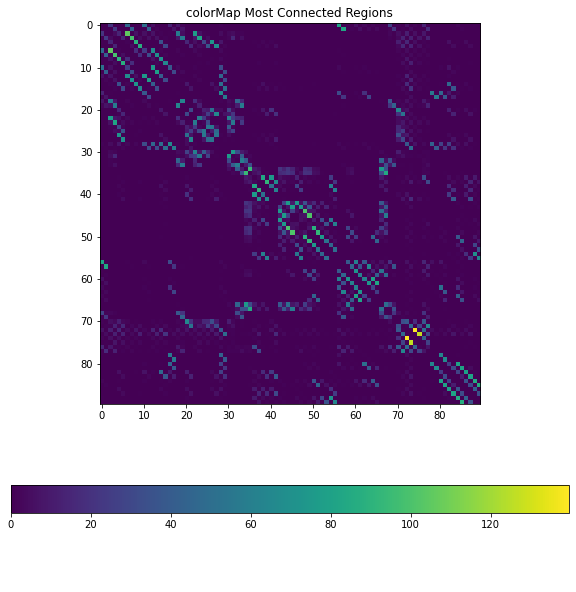

In [26]:


def matrixToVector(matrixTrain, matrixTest,lista_nomes):
    
    # inicializar Matriz de somas tudo a 0
    somasMatrix = [[0 for col in range(90)] for row in range(90)]   

    # Obter Soma da Matriz
    for lin in range(90): # linhas
        for col in range(90): #colunas
            for image in range(len(matrixTrain)):
                somasMatrix[lin][col] += matrixTrain[image][lin][col] 
            for image1 in range(len(matrixTest)):
                somasMatrix[lin][col] += matrixTest[image1][lin][col] 

    # ---------- Print Resulting Matrix ---------- #

    # print(somasMatrix)
    #matrixA = somasMatrix 
    # from copy import copy, deepcopy
    #y = deepcopy(x)
    #df = pd.DataFrame(matrixA)
    #df.style.highlight_max(color = 'lightgreen', axis = 1)
    #print(df)

    #import numpy as np
    #import matplotlib.pyplot as plt

    H = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])  # added some commas and array creation code

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap Most Connected Regions')
    plt.imshow(somasMatrix)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='horizontal', ax=ax)
    plt.show()

    for line in somasMatrix:
        print ('  '.join(map(str, line)))
    

    # --------------------------------- # 
    
    vector_train = [[] for elem in range(len(matrixTrain))]
    vector_test = [[] for elem in range(len(matrixTest))]

    # Conversão Array de Matrizes para Array de Vetores
    for lin in range(90): # linhas
        for col in range(90): #colunas
            if lin < col :
                if somasMatrix[lin][col] != 0.0:
                    n_1 = "% s" % lin 
                    n_2 = "% s" % col 
                    nome = n_1 +" "+ n_2
                    lista_nomes.append(nome)
                for image in range(len(matrixTrain)):
                    if somasMatrix[lin][col] != 0.0:
                        vector_train[image].append(matrixTrain[image][lin][col])
                    
                for image in range(len(matrixTest)):
                    if somasMatrix[lin][col] != 0.0:
                        vector_test[image].append(matrixTest[image][lin][col])
                        
    # ATENÇÃO: os zeros que sobram são das pessoas que têm patologias, 
    # ou seja onde há partes do seu cérebro que não conectam, 
    return vector_train,vector_test

lista_nomes = []
vector_train_data, vector_test_data = matrixToVector(train_data, test_data,lista_nomes)



In [27]:
lista_nomes.__len__()

1202

In [28]:
arr_vector_train = np.array(vector_train_data)
arr_vector_test = np.array(vector_test_data)

In [29]:
arr_vector_train

In [30]:
arr_vector_test

In [31]:
# 90 x 90 = 8100 -> Matriz
# (90 x 89) / 2 = 4005 -> Meia Matriz
# 1202 (sem zeros comuns) -> Vetor (6,7x menor)
  

# 4. Dividir dados em treino, validação e teste

In [32]:
from sklearn.model_selection import train_test_split

aux = train_extra.drop(['id','age'],axis = 1)
train_data = np.concatenate((arr_vector_train, aux.to_numpy()), axis=1)

y = train_extra['age']
X_train, X_test, y_train, y_test = train_test_split(train_data, train_extra['age'].to_numpy(), test_size=0.11,random_state = 200)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state= 1534)

X_train_data = np.hsplit(X_train, [1202, 1205])[0]
train_extra_data = np.hsplit(X_train, [1202, 1205])[1]

X_test_data = np.hsplit(X_test, [1202, 1205])[0]
test_extra_data = np.hsplit(X_test, [1202, 1205])[1]

X_val_data = np.hsplit(X_val, [1202, 1205])[0]
val_extra_data = np.hsplit(X_val, [1202, 1205])[1]

# 5. Definição do Modelo

In [33]:

image_input = Input((1202,1))

x = Conv1D(filters = 128, kernel_size = 5 , activation ='LeakyReLU',padding = 'same')(image_input)
x = Conv1D(filters = 90, kernel_size = 5 , activation ='LeakyReLU',padding = 'same')(x)
x = MaxPool1D(pool_size= 2)(x)

x = Conv1D(filters = 64, kernel_size = 5 , activation ='LeakyReLU',padding = 'same')(x)
x = Conv1D(filters = 32, kernel_size = 5 , activation ='LeakyReLU',padding = 'same')(x)
x = MaxPool1D(pool_size= 2)(x)

x = Flatten()(x)

vector_input = Input((3,))
yl = Concatenate()([x, vector_input])

z = Dense(90, activation = "LeakyReLU")(yl)
z = Dropout(0.3)(z)

#z = Dense(60, activation = "LeakyReLU")(z)
#z = Dropout(0.3)(z)

z = Dense(30, activation = "LeakyReLU")(z)
z = Dropout(0.3)(z)

z = Dense(15, activation = "LeakyReLU")(z)

output = Dense(1,activation = "linear")(z)

model = tf.keras.Model(inputs=[image_input, vector_input], outputs=output)
#model = tf.compat.v1.keras.Model(inputs=[image_input, vector_input], outputs=output)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1202, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 1202, 128)    768         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 1202, 90)     57690       ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 601, 90)      0           ['conv1d_1[0][0]']               
                                                                                              

# 6. Treino do Modelo

In [ ]:
!pip install eli5

In [35]:
model.compile(loss= 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['mean_absolute_error'])

In [36]:
train_aux = train_extra.drop(['id','age'],axis = 1)

In [37]:
reduce_lr = ReduceLROnPlateau(monitor='mean_absolute_error', factor=0.5,
                              patience= 10, min_lr=0.00001)

#es=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=30,
 #                                    verbose=1,  restore_best_weights=True)

In [36]:
history = model.fit([X_train_data,train_extra_data],
                    y_train,
                    batch_size= 32,
                    validation_data = ([X_val_data,val_extra_data],y_val),
                    callbacks = [reduce_lr],
                    epochs = 100)

3/3 [==============================] - 2s 499ms/step - loss: 43.6678 - mean_absolute_error: 43.6678 - val_loss: 27.0063 - val_mean_absolute_error: 27.0063 - lr: 0.0050


**Calcular diferença entre idade prevista e idade biológica**

In [37]:
predictions = model.predict([X_test_data,test_extra_data])
predictions = predictions.astype(int)


df = pd.DataFrame(predictions,columns=['Predicted_values'])
df['Real_values'] = y_test
df['Diff'] = df['Predicted_values'] - df['Real_values']
df['Diff_abs'] = df['Diff'].abs()
df.sort_values(by=['Diff_abs'],ascending=[False])

1/1 [==============================] - 0s 211ms/step


,Predicted_values,Real_values,Diff,Diff_abs
1,141,15,126,126
4,142,24,118,118
8,137,19,118,118
5,134,17,117,117
7,137,25,112,112
9,139,28,111,111
3,129,21,108,108
2,150,53,97,97
11,147,51,96,96
12,156,71,85,85


In [38]:
df.boxplot(column=['Diff_abs'])

<AxesSubplot:>

# 7. Avaliação de performance modelo

In [40]:

#plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 6]})
#Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#Learning rate
plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['lr'])
plt.title('learning rate decay')
plt.ylabel('lr')
plt.xlabel('epoch')

plt.tight_layout()

plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)

plt.show()

# 8. Feature importance

In [40]:
from keras.wrappers.scikit_learn import KerasRegressor


def regression_model():
    return model

estimator = KerasRegressor(build_fn=regression_model, validation_split = 0.1, batch_size=32, epochs=50, verbose=0)

['input_1',
 'conv1d',
 'conv1d_1',
 'max_pooling1d',
 'conv1d_2',
 'conv1d_3',
 'max_pooling1d_1',
 'flatten',
 'input_2',
 'concatenate',
 'dense',
 'dropout',
 'dense_1',
 'dropout_1',
 'dense_2',
 'dense_3']

In [ ]:
history1 = estimator.fit([X_train_data,train_extra_data],y_train)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator, random_state=1).fit([X_train_data,train_extra_data],y_train)
eli5.show_weights(perm,feature_names = lista_nomes)

# 9. Teste do modelo

In [45]:
teste_aux = test_extra.drop(['id'],axis = 1)

In [46]:
predictions = model.predict([arr_vector_test,teste_aux.to_numpy()])
predictions = predictions.astype(int)
print(predictions)

ValueError: ValueError: Calling `Model.predict` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.predict` with eager mode enabled.

# 10. Converter resultados do teste em CSV

In [98]:
teste_submission_df = pd.DataFrame (predictions, columns = ['age'])
teste_submission_df.insert(0, 'id', range(1, 1 + len(teste_submission_df)))
print(teste_submission_df)
#teste_submission_df.to_csv('submission1.csv', index=False)

    id  age
0    1   23
1    2   28
2    3   17
3    4   16
4    5   18
5    6   22
6    7   69
7    8   47
8    9   64
9   10   50
10  11   58
11  12   52
12  13   56
13  14   47
14  15   23
15  16   36
16  17   17
17  18   41
18  19   34
19  20   36
20  21   69
21  22   41
22  23   59
23  24   62
24  25   56
25  26   68
26  27   49
27  28   52


# Sheet 2

**Funcões auxiliares determinar o número de zonas disconectadas dos indivíduos**

In [38]:
def count_zero(vec_input):
    # inicializar contador que devolve o número total de zeros
    counter = 0

    for connection in vec_input:
        #Se as zonas cerebrais nao estiverem conectadas então incrementa-se o contador
        if connection == 0:
            counter += 1
        else:
            pass

    return  counter



def people_with_patology(arr):
    
    number_of_zeros_arr = []
    for vec in arr:
        i = count_zero(vec)
        number_of_zeros_arr.append(i)
    
    return number_of_zeros_arr

In [39]:
number_of_zeros = people_with_patology(arr_vector_train)

patology_data = pd.DataFrame(number_of_zeros,columns=['Number_of_Disconnections'])
patology_data.insert(0, 'Id', range(1, 113))

patology_data['Number_of_Disconnections'].mean()

552.4553571428571

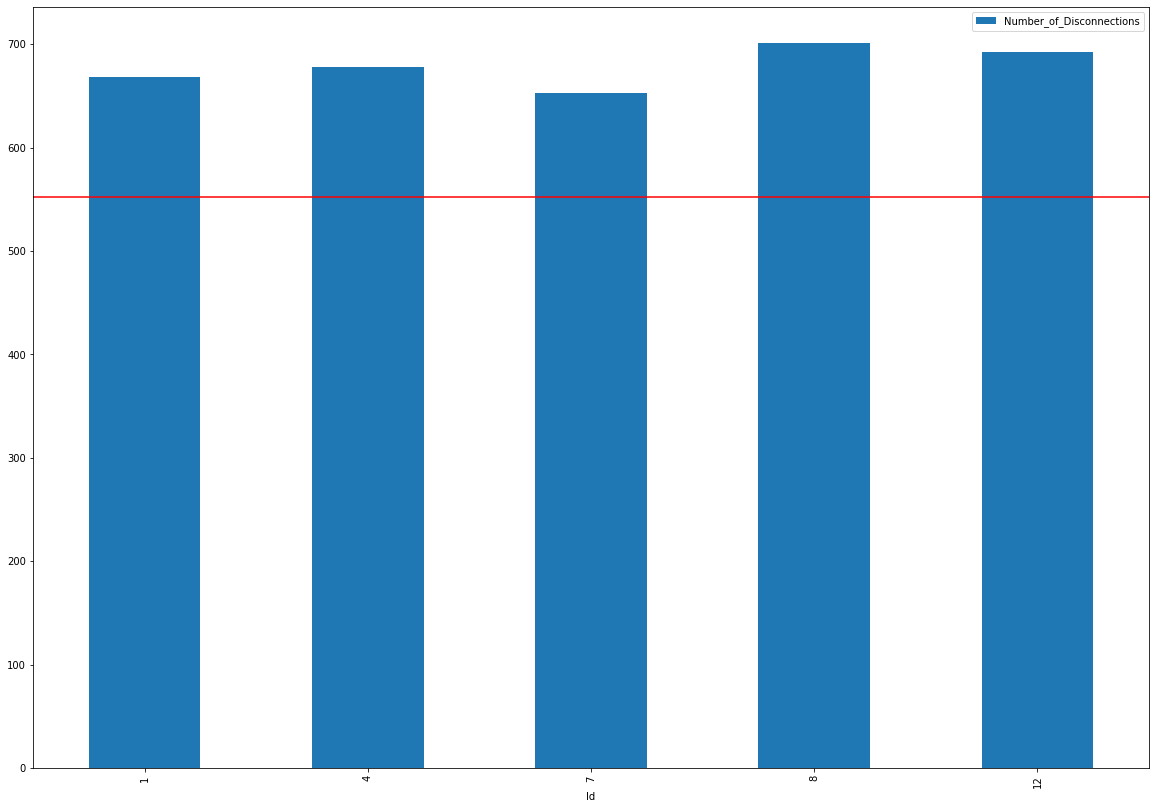

In [40]:
rslt = patology_data[patology_data['Id'].isin([1,4,7,8,12])] 
rslt.plot(x="Id", y="Number_of_Disconnections", kind="bar",figsize = (20,14))
plt.axhline(y=552.45, color='r', linestyle='-')

Line graph: 


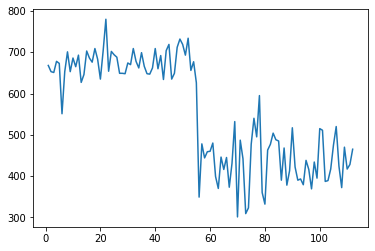

In [75]:
print("Line graph: ")
plt.plot(patology_data["Id"], patology_data["Number_of_Disconnections"])
plt.show()